# Segment nuclei and cells (blobs and things with membranes)
In this section we will use a watershed approach to cell segmentation. Therefore, we use the napari plugin [napari-segment-blobs-and-things-with-membranes](https://github.com/haesleinhuepf/napari-segment-blobs-and-things-with-membranes). Under the hood, this plugins uses functions from [scikit-image](http://scikit-image.org/).

In [8]:
from napari_segment_blobs_and_things_with_membranes import voronoi_otsu_labeling, \
                                                           seeded_watershed, \
                                                           local_minima_seeded_watershed
from skimage.io import imread
from skimage.filters import gaussian
from skimage import data
from pyclesperanto_prototype import imshow

In [2]:
cells = data.cells3d()

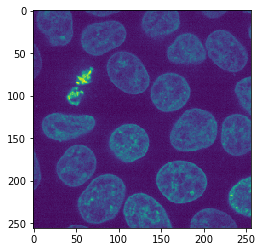

In [3]:
nuclei_channel = cells[30, 1]

imshow(nuclei_channel)

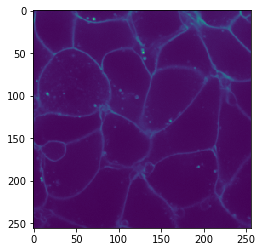

In [4]:
membrane_channel = cells[30, 0]

imshow(membrane_channel)

## Voronoi-Otsu-Labeling for nuclei segmentation
First, we start with segmenting the nuclei using the [Voronoi-Otsu-Labeling algorithm](image-segmentation:voronoi-otsu-labeling).

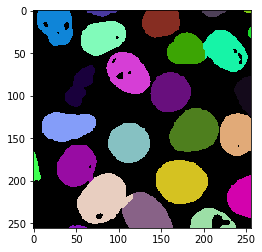

In [5]:
labeled_nuclei = voronoi_otsu_labeling(nuclei_channel, spot_sigma=10, outline_sigma=2)

imshow(labeled_nuclei, labels=True)

## Seeded watershed
We can use the image of labeled nuclei as starting point for flooding the low-intensity areas in the membrane image. This allows us to determine a cell segmentation.

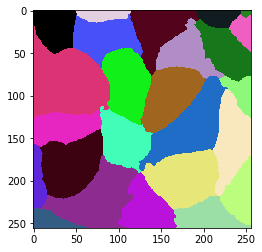

In [6]:
labeled_cells = seeded_watershed(membrane_channel, labeled_nuclei)

imshow(labeled_cells, labels=True)

If the outlines of the cells are not 100% accurate, it may make sense to blur the membrane image a bit before segmenting the cells.

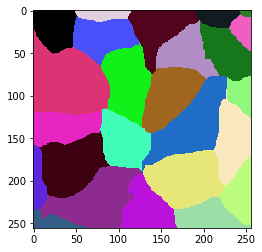

In [10]:
blurred = gaussian(membrane_channel, sigma=3)

labeled_cells = seeded_watershed(blurred, labeled_nuclei)

imshow(labeled_cells, labels=True)

## Segment watershed using automatic seed detection

In case we didn't image a separate nuclei channel and only have the membrane channel available for segmentation, we can use the membrane image to search for local minima (dark areas).

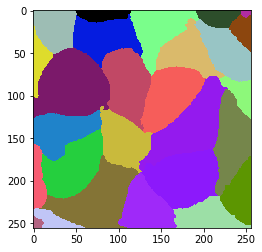

In [15]:
cells = local_minima_seeded_watershed(membrane_channel)
                              
imshow(cells, labels=True)

This function also has some parameters to allow fine tuning the segmentation. The parameter `outline_sigma` allows to control a Gaussian blur filter that allows fine-tuning the outlines of the segmented cells as shown above.

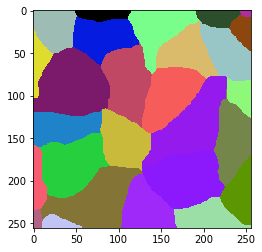

In [ ]:
cells = local_minima_seeded_watershed(membrane_channel, outline_sigma=3)
                              
imshow(cells, labels=True)

If there multiple cells sticking together, it may make sense to specify `spot_sigma`. This parameter allows to configure how close / large cells are.

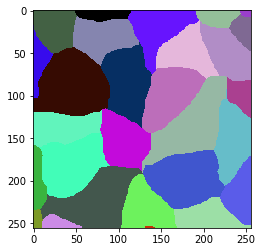

In [30]:
cells = local_minima_seeded_watershed(membrane_channel, spot_sigma=9, outline_sigma=3)
                              
imshow(cells, labels=True)